In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import hyclib as lib
from hyclib.sp import stats

In [3]:
lib.logging.basic_config()
logging.captureWarnings(True) 
logger = logging.getLogger(__name__)

{'x': array([ 0.47368421,  1.42105263,  2.36842105,  3.31578947,  4.26315789,
        5.21052632,  6.15789474,  7.10526316,  8.05263158,  9.        ,
        9.94736842, 10.89473684, 11.84210526, 12.78947368, 13.73684211,
       14.68421053, 15.63157895, 16.57894737, 17.52631579]), 'y': array([-0.01408797, -0.0227798 ,  0.00175112,  0.03305718,  0.0978829 ,
        0.04776662,  0.08029443,  0.06956061,  0.33476553, -0.06137414,
       -0.07059   , -0.10609316, -0.02900036, -0.0187883 , -0.0584314 ,
       -0.02033019,  0.05125035, -0.02552311, -0.01305337]), 'yerr': array([0.00411313, 0.00252236, 0.02032855, 0.00049519, 0.01195727,
       0.00516345, 0.0079559 , 0.01241825, 0.00187416, 0.01666851,
       0.03017907, 0.01228739, 0.01832908, 0.02207788, 0.0064688 ,
       0.01349114, 0.00602944, 0.00686532, 0.01387614])}


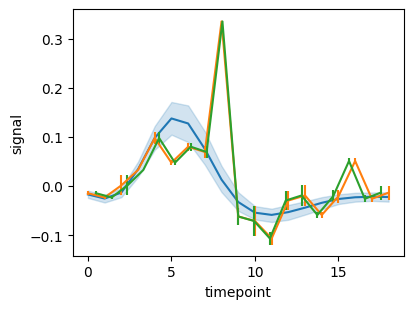

In [4]:
df = sns.load_dataset('fmri')
signal_err = np.abs(np.random.normal(size=len(df['signal'])))
signal_err[np.arange(100)] = np.nan
df['signal_err'] = signal_err
# print(df['timepoint'])
sns.lineplot(df, x='timepoint', y='signal')
lib.plot.lineplot(df, x='timepoint', y='signal', yerr='signal_err', weighted=True)

result = stats.binned_mean(df['timepoint'], df['signal'], df['signal_err'], bins=len(df['timepoint'].unique()), weighted=True)
print(result)
plt.errorbar(**result)
plt.show()

In [38]:
x = np.array([-1,0,1,1,2,3,5,7,9,10,5,7,3,2,4,4])
y = np.array([-1,0,1,1,2,3,5,7,9,10,5,7,3,2,4,4])
bins = (2,5)
sample = np.array([x,y]).T
print(sample.shape)
bin_nums, centers, edges = lib.sp.stats.digitize_dd(sample, bins)
print(bin_nums)
print(bin_nums.shape)
print(centers)
print(edges)
print(centers[0][bin_nums[0]])
print(centers[1][bin_nums[1]])

(16, 2)
[[1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1]
 [1 1 1 1 2 2 3 4 5 5 3 4 2 2 3 3]]
(2, 16)
[array([ nan, 1.75, 7.25,  nan]), array([nan, 0.1, 2.3, 4.5, 6.7, 8.9, nan])]
[array([-1. ,  4.5, 10. ]), array([-1. ,  1.2,  3.4,  5.6,  7.8, 10. ])]
[1.75 1.75 1.75 1.75 1.75 1.75 7.25 7.25 7.25 7.25 7.25 7.25 1.75 1.75
 1.75 1.75]
[0.1 0.1 0.1 0.1 2.3 2.3 4.5 6.7 8.9 8.9 4.5 6.7 2.3 2.3 4.5 4.5]
